In [1]:
import os 
root_dir = os.path.abspath('')
os.chdir(root_dir)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from src.eda import *

In [29]:
import importlib
from src import eda
importlib.reload(eda)
from src.eda import *

In [5]:
df = pd.read_csv('data/train_data.txt')
df_test = pd.read_csv('data/test_data.txt')

In [6]:
print('Train: ', len(df))
print('Test: ', len(df_test))

Train:  5822
Test:  4000


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      5822 non-null   int64
 1   1       5822 non-null   int64
 2   2       5822 non-null   int64
 3   3       5822 non-null   int64
 4   4       5822 non-null   int64
 5   5       5822 non-null   int64
 6   6       5822 non-null   int64
 7   7       5822 non-null   int64
 8   8       5822 non-null   int64
 9   9       5822 non-null   int64
 10  10      5822 non-null   int64
 11  11      5822 non-null   int64
 12  12      5822 non-null   int64
 13  13      5822 non-null   int64
 14  14      5822 non-null   int64
 15  15      5822 non-null   int64
 16  16      5822 non-null   int64
 17  17      5822 non-null   int64
 18  18      5822 non-null   int64
 19  19      5822 non-null   int64
 20  20      5822 non-null   int64
 21  21      5822 non-null   int64
 22  22      5822 non-null   int64
 23  23      5822 

In [8]:
demo_feat = [str(i) for i in range(1,43)]
prod_own_feat = [str(i) for i in range(43, 86)]
label = ['86']

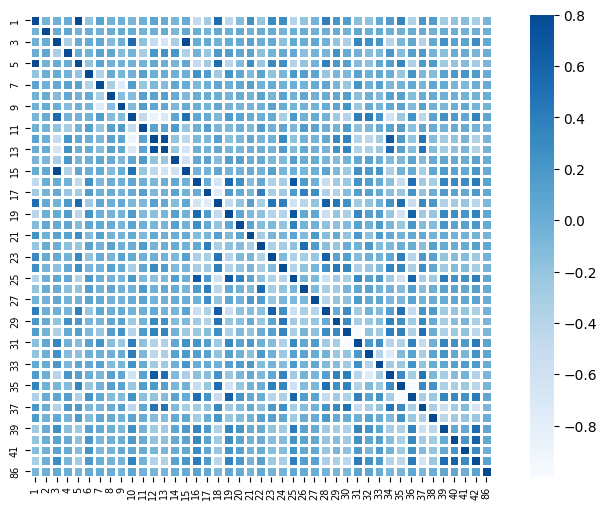

In [9]:
plot_corr_matrix(df[demo_feat+label])

In [10]:
def regroup(row):
    if row in (1,2,3,4,7):
        return 'high'
    elif row in (8,9,10,11,12,13,14,15,22,26,27,28,29,30,34,35,36,37,38):
        return 'mid'
    elif row in (16,17,18,19,21,23,24,25,31,33,41):
        return 'low'
    else:
        return 'others'

In [11]:
df['social_class'] = df['1'].apply(lambda row: regroup(row)) 

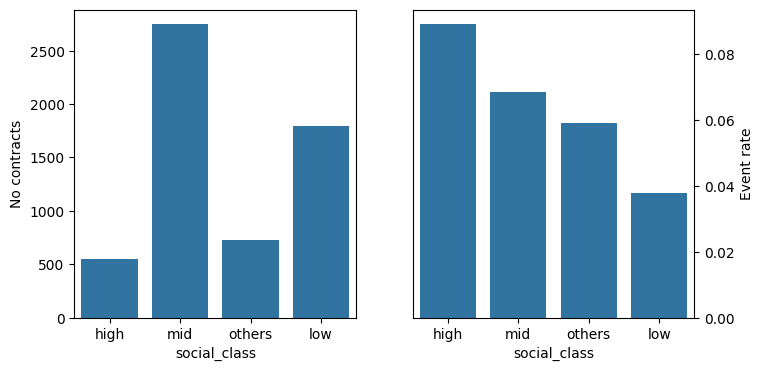

In [30]:
plot_stats('social_class', label[0], df)

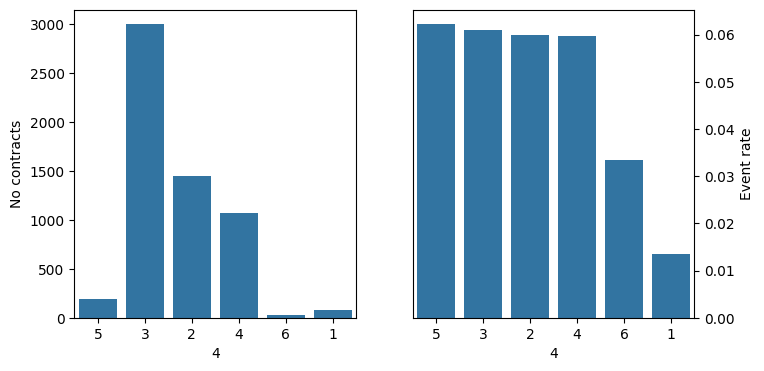

In [31]:
plot_stats('4', label[0], df)

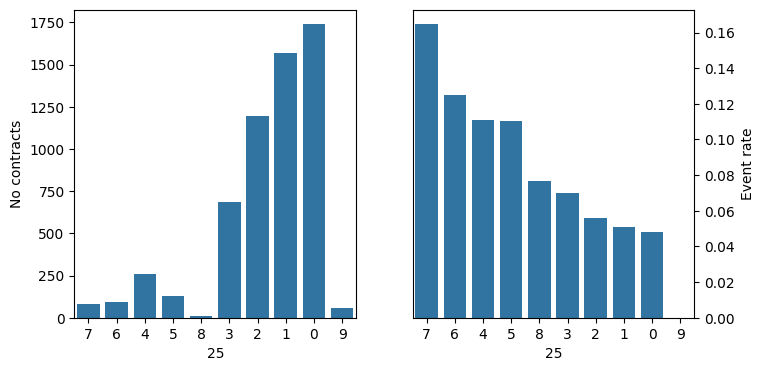

In [32]:
plot_stats('25', label[0], df)

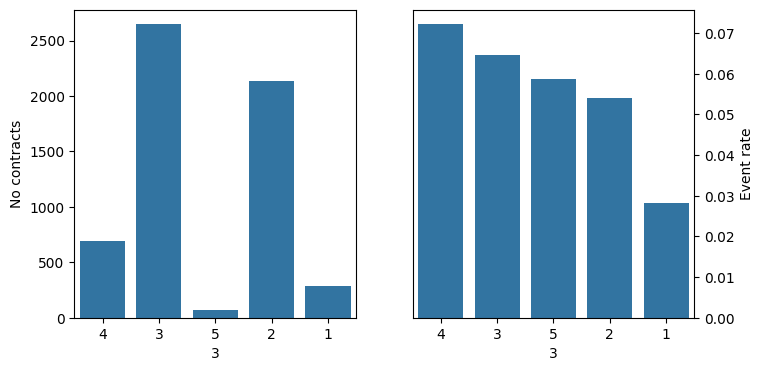

In [33]:
plot_stats('3', label[0], df)

In [ ]:
df['14'].value_counts(dropna=False)

In [ ]:
df.head(20)

In [ ]:
df['68'].value_counts()

In [ ]:
df['47'].value_counts()

In [ ]:
plot_corr_matrix(df[prod_own_feat+label])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
X = df[demo_feat+prod_own_feat]
# X = df[prod_own_feat]
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
for i in [90, 100, 110, 130, 150, 170, 180, 190]:
    clf = RandomForestRegressor(n_estimators = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.roc_auc_score(y_test, y_pred)
    print(f"N_estimator {i} - AUC: {accuracy}", )

In [ ]:
for i in [200, 230, 250, 300, 350, 400, 500, 600]:
    clf = RandomForestRegressor(n_estimators = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.roc_auc_score(y_test, y_pred)
    print(f"N_estimator {i} - AUC: {accuracy}", )

In [ ]:
clf = RandomForestRegressor(n_estimators = 150, random_state=1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [ ]:
scores

In [ ]:
from numpy import mean, std
print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
0.682*2-1

In [ ]:
0.69*2-1

In [ ]:
from mapie.regression import MapieRegressor

mapie_regressor = MapieRegressor(clf)
mapie_regressor.fit(X_train, y_train)

alpha = [0.05, 0.32]
y_pred, y_pis = mapie_regressor.predict(X_test, alpha=alpha)